In [1]:
from qiskit import IBMQ
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}

In [2]:
provider = IBMQ.load_account()
#change the provider based on your Qiskit account
#if you do not have access to the twenty qubit machine, use the publically available backend instead
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [3]:
from qiskit import *
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise
import math

import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

from qiskit.providers.aer import UnitarySimulator
import qiskit.ignis.verification.tomography.basis.circuits

In [4]:
# Needed for functions
import numpy as np
import time
from copy import deepcopy

# Import Qiskit classes
import qiskit 
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise

#Include our assertion function
from qiskit.compiler.assertion import classical_assertion, superposition_assertion, entanglement_assertion

In [5]:
#We used ibmq_20_tokyo for our experiment, however, that backend has retired. So we can use the publically available ibmqx2 backend instead
device = provider.get_backend('ibmqx2')
#if you have access to the twenty qubit machine, use this 20 qubit machine instead
#device = provider.get_backend('ibmq_boeblingen')
backend_monitor(device)
device

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 7
    backend_version: 2.0.2
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    backend_name: ibmqx2
    url: None
    quantum_volume: 8
    open_pulse: False
    allow_object_storage: True
    online_date: 2017-01-24T05:00:00+00:00
    allow_q_circuit: False
    conditional: False
    n_registers: 1
    max_experiments: 75
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]
    memory: True
    credits_required: True
    allow_q_object: True
    max_shots: 8192
    sample_name: sparrow
    description: 5 qubit device

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28627 GHz / 34.92678 µs / 36.50602 µs / 0.0 / 0.00058 / 0.00117 / 0.014
    Q1 / 5.23782 GHz / 57.77644 

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
#entangle3bit:
qr = QuantumRegister(3)
circ = QuantumCircuit(qr)
#assertion circuit for three qubit entanglement
qubitList = [qr[0], qr[1], qr[2]]
success = entanglement_assertion(circ, qubitList, flag = 0)
if not success:
    print("entanglement_assertion error")
trans_qc = transpile(circ, device, optimization_level = 3)

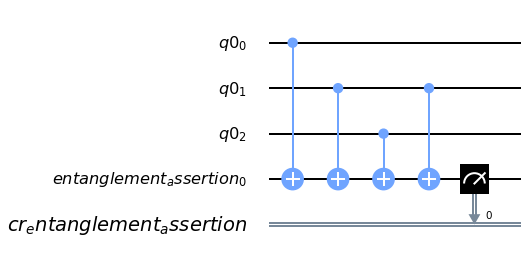

In [7]:
circ.draw(output = "mpl")

In [8]:
shots = 8192
#execute the job on real device
job = execute(trans_qc, backend=device, shots=shots)
job_monitor(job)
res = job.result()

Job Status: job has successfully run


In [9]:
res.job_id

'5e15e16885a7c400191afee8'

In [10]:
prob = res.get_counts(0)['1']/8192
print("Probability of false positive case = ", prob * 100, "%")

Probability of false positive case =  7.3486328125 %
